# Text Preparation
## Movie Plots


In [1]:
# import movies data set
movies <- readr::read_csv("data/movies.csv")
movie_plots <- movies$Plot

Parsed with column specification:
cols(
  `Release Year` = col_double(),
  Title = col_character(),
  `Origin/Ethnicity` = col_character(),
  Director = col_character(),
  Cast = col_character(),
  Genre = col_character(),
  `Wiki Page` = col_character(),
  Plot = col_character(),
  `Running time` = col_double(),
  Budget = col_character(),
  `Box office` = col_character()
)


#### Perform spaCy Parsing at first

In [2]:
#library(spacyr)
#spacy_initialize(model = "en")
#parsed_plots <- spacy_parse(x = movie_plots, lemma = TRUE, pos = TRUE, entity = TRUE)

# This would calculate quite a while --> prepared data
load(file = "data/parsed_plots.RData")
colnames(parsed_plots) <- c("doc_id","sentence_id","token_id","lemma","token","pos","entity")

parsed_plots<-parsed_plots[-which(parsed_plots$entity=="PERSON"),]

### Package tmca.util contains several functions and wrappers to perform pre-processing and create a documents term matrix

Loading required package: Matrix
Warning message:
“package ‘Matrix’ was built under R version 3.6.2”Loading required package: testthat
Loading required package: htmltools


[1] "Transforming spacy_parsed object to quanteda tokens"
[1] "Already tokenized"
[1] "(quanteda) To lower case"
[1] "(quanteda) Removing"
[1] "(quanteda) Building ngrams"
[1] " ---> Created 0 new features by ngrams"
[1] "(quanteda) Constraining token length"
[1] " ---> Removed 106 tokens"
[1] " ---> Docs: 5210 , Features:  57240"
[1] "Pruning option was set so format is coeerced to quanteda::dfm"
[1] "(quanteda) Pruning: (Docs:  5210 , Features:  57240 )"
[1] " ---> (Docs: 5210 , Features:  57240 )"
-pron-    the     to    and     be     of     in     's   that   with   have 
231709 175381 120480 113941  86930  52308  49245  37896  34384  34230  26091 
  \r\n    for     by     as     on    but     at    who   from     an  after 
 24817  22922  22912  21391  19315  17518  16738  16072  15193  14035  12490 
  when   into    out 
 10865   9985   9528 


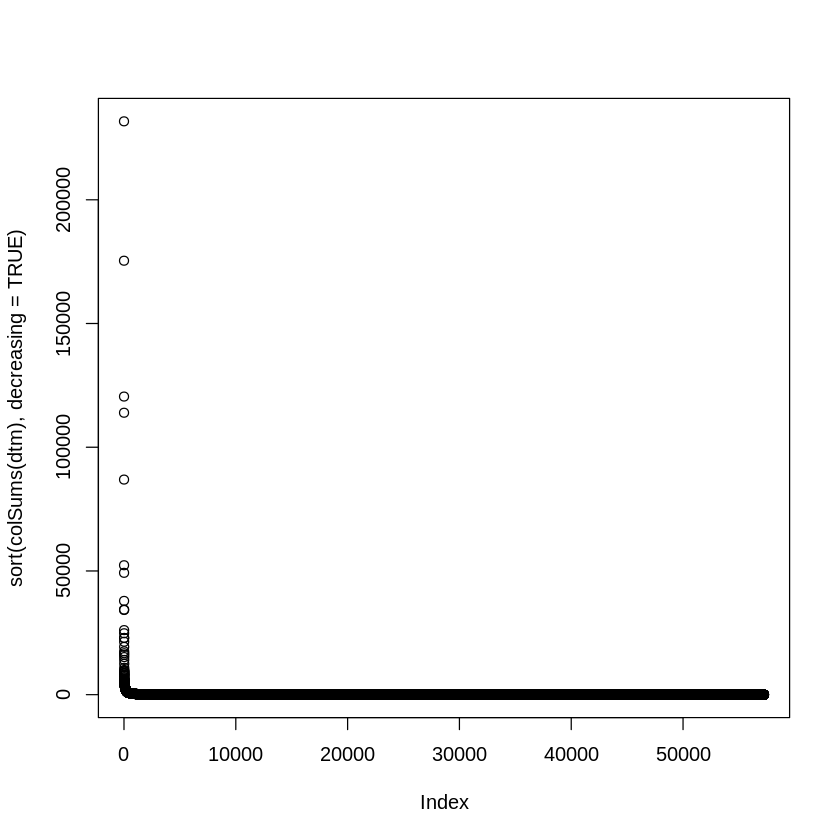

In [3]:
library(tmca.util)
# create new object for pre-processing
tow<-tmca.util::TextObjectWrapper$new()
tow$input(x = parsed_plots)
# control list defines the pre-processing options
control=plyr::compact(
    list(
      language="en",
      ngrams=1,
      remove_stopwords=FALSE,
      remove_numbers=FALSE,
      remove_all_numbers=FALSE,
      remove_punctuation=FALSE,
      remove_hyphenation=FALSE,
      remove_custom=NULL,
      save_custom=NULL,
      tolower = TRUE,
      char_length=c(2,50),
      prune=list(
        min_termfreq = NULL,
        max_termfreq = NULL,
        min_docfreq = NULL, 
        max_docfreq = NULL,
        termfreq_type = "count",
        docfreq_type = "count"
      )
    )
)
     
dtm<-tow$process(control = control, backend = "quanteda")%>%
        tow$output(format = "sparseMatrix")
print(sort(colSums(dtm), decreasing = TRUE)[1:25])
plot(sort(colSums(dtm),decreasing = TRUE))

In [4]:
control=plyr::compact(
    list(
      language="en",
      ngrams=1,
      remove_stopwords=TRUE,
      remove_numbers=FALSE,
      remove_all_numbers=FALSE,
      remove_punctuation=FALSE,
      remove_hyphenation=FALSE,
      remove_custom=c("'s","\r\n"),
      save_custom=NULL,
      tolower = TRUE,
      char_length=c(2,50),
      prune=list(
        min_termfreq = NULL,
        max_termfreq = NULL,
        min_docfreq = NULL, 
        max_docfreq = NULL,
        termfreq_type = "count",
        docfreq_type = "count"
      )
    )
)
tow$reset()    
dtm<-tow$process(control = control, backend = "quanteda")%>%
        tow$output(format = "sparseMatrix")
print(sort(colSums(dtm), decreasing = TRUE)[1:25])

[1] "Transforming spacy_parsed object to quanteda tokens"
[1] "Already tokenized"
[1] "(quanteda) To lower case"
[1] "(quanteda) Removing"
[1] "(quanteda) Removing custom list"
[1] " ---> Features: 57344"
[1] "(quanteda) Building ngrams"
[1] " ---> Created 0 new features by ngrams"
[1] "(quanteda) Removing Stopwords"
[1] " ---> Removed 1138964 tokens"
[1] " ---> Docs: 5210 , Features:  57234"
[1] "(quanteda) Constraining token length"
[1] " ---> Removed 104 tokens"
[1] " ---> Docs: 5210 , Features:  57130"
[1] "Pruning option was set so format is coeerced to quanteda::dfm"
[1] "(quanteda) Pruning: (Docs:  5210 , Features:  57130 )"
[1] " ---> (Docs: 5210 , Features:  57130 )"
-pron-   find   kill   take     go  leave   tell    get   make   back    one 
231709   9380   8826   8550   8060   7994   7729   6604   5699   5519   5383 
return    man    see   give father    try reveal    two   home become friend 
  5376   5278   5175   4712   4675   4640   4587   4583   4568   4552   4529 
   

In [5]:
control=plyr::compact(
    list(
      language="en",
      ngrams=1,
      remove_stopwords=TRUE,
      remove_numbers=TRUE,
      remove_all_numbers=TRUE,
      remove_punctuation=TRUE,
      remove_hyphenation=TRUE,
      remove_custom=c("'s","\r\n","-pron-"),
      save_custom=NULL,
      tolower = TRUE,
      char_length=c(2,50),
      prune=list(
        min_termfreq = 10,
        max_termfreq = NULL,
        min_docfreq = 5, 
        max_docfreq = NULL,
        termfreq_type = "count",
        docfreq_type = "count"
      ),
    tfidf=TRUE
     )
)
tow$reset()    
dtm<-tow$process(control = control, backend = "quanteda")%>%
        tow$output(format = "sparseMatrix")
print(sort(colSums(dtm), decreasing = TRUE)[1:25])

[1] "Transforming spacy_parsed object to quanteda tokens"
[1] "Already tokenized"
[1] "(quanteda) To lower case"
[1] "(quanteda) Removingall_numbers, hyphenation, punctuation, numbers"
[1] " ---> Removed 454646 tokens"
[1] " ---> Docs: 5210 , Features:  53445"
[1] "(quanteda) Removing custom list"
[1] " ---> Features: 53442"
[1] "(quanteda) Building ngrams"
[1] " ---> Created 0 new features by ngrams"
[1] "(quanteda) Removing Stopwords"
[1] " ---> Removed 1138964 tokens"
[1] " ---> Docs: 5210 , Features:  53332"
[1] "(quanteda) Constraining token length"
[1] " ---> Removed 63 tokens"
[1] " ---> Docs: 5210 , Features:  53269"
[1] "Pruning option was set so format is coeerced to quanteda::dfm"
[1] "(quanteda) Pruning: (Docs:  5210 , Features:  53269 )"
[1] " ---> (Docs: 5210 , Features:  9774 )"
[1] "(quanteda) Weighting by tfidf"
    kill   father    house      car   family     team      man   police 
2515.337 2004.697 1907.781 1824.277 1818.898 1796.543 1795.896 1751.442 
  mother   sc

In [6]:
thriller_ids <- which(movies$Genre=="thriller")


In [7]:
sort(colMeans(dtm[thriller_ids, ],),decreasing=T)[1:20]


murder      kill    police    killer     julia     emily     shoot     phone 
0.7922987 0.7291346 0.6803437 0.5933379 0.5891050 0.5484228 0.5333485 0.5290802 
      car apartment       man     house     stone      call       say     agent 
0.5263301 0.4739574 0.4625190 0.4564338 0.4529031 0.4401225 0.4399498 0.4396531 
president      wife      room       fbi 
0.4298412 0.4069014 0.4061835 0.4031975

In [8]:
sort(table(movies$Genre),decreasing=T)


                                                    comedy 
                                                       941 
                                                     drama 
                                                       766 
                                                   unknown 
                                                       287 
                                                    horror 
                                                       275 
                                                    action 
                                                       260 
                                                  thriller 
                                                       231 
                                               crime drama 
                                                       184 
                                           science fiction 
                                                       163 
                                       

In [9]:
vocab_comedy <- sort(colMeans(dtm[which(movies$Genre=="comedy"), ],),decreasing=T)[1:50]
vocab_drama <- sort(colMeans(dtm[which(movies$Genre%in%c("drama","crime drama")), ],),decreasing=T)[1:50]
vocab_horror <- sort(colMeans(dtm[which(movies$Genre=="horror"), ],),decreasing=T)[1:50]
vocab_fantasy <- sort(colMeans(dtm[which(movies$Genre=="fantasy"), ],),decreasing=T)[1:50]
vocab_romantic <- sort(colMeans(dtm[which(movies$Genre%in%c("romance","romantic comedy")), ],),decreasing=T)[1:50]
vocab_scifi <- sort(colMeans(dtm[which(movies$Genre%in%c("sci-fi","science fiction")), ],),decreasing=T)[1:50]
vocab_western <- sort(colMeans(dtm[which(movies$Genre=="western"), ],),decreasing=T)[1:50]
vocab_action <- sort(colMeans(dtm[which(movies$Genre=="action"), ],),decreasing=T)[1:50]                             
                                 
                                 
                                 

In [10]:
library(wordcloud2)
create_wordcloud <- function(vocab, ...){
    data<-data.frame(word=names(vocab),freq=vocab)
    return(wordcloud2(data = data, fontFamily = "Helvetica",minSize = 0.1, size= 0.75, ...))
}

create_wordcloud(vocab = vocab_western)

HTML widgets cannot be represented in plain text (need html)

In [11]:
create_wordcloud(vocab = vocab_romantic)


HTML widgets cannot be represented in plain text (need html)

In [12]:
create_wordcloud(vocab = vocab_fantasy)

HTML widgets cannot be represented in plain text (need html)

In [13]:
create_wordcloud(vocab = vocab_scifi)


HTML widgets cannot be represented in plain text (need html)

In [14]:
create_wordcloud(vocab = vocab_drama)

HTML widgets cannot be represented in plain text (need html)

In [15]:
create_wordcloud(vocab = vocab_comedy)


HTML widgets cannot be represented in plain text (need html)

In [16]:
create_wordcloud(vocab = vocab_action)

HTML widgets cannot be represented in plain text (need html)

### get similar movies

In [17]:
# starting point
basis_movie <- "Titanic"
basis_vector <- dtm[which(movies$Title=="Titanic"),]


In [24]:
library(lsa)
class(basis_vector)
length(basis_vector)

cosine_distances<-NULL
for( i in 1:nrow(dtm)){
   cosine_distances<-c(cosine_distances,lsa::cosine(x = dtm[i,], basis_vector)) 
}




[1] "numeric"

[1] 9774

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [29]:
names(cosine_distances)<-movies$Title
sort(cosine_distances,decreasing=T)[1:10]

Titanic                Titanic 3D      Crazy, Stupid, Love. 
                1.0000000                 1.0000000                 0.7737722 
            State of Play                  Zero Day                 Legendary 
                0.6612455                 0.5143348                 0.4765691 
Life or Something Like It           Forbidden World    The 40-Year-Old Virgin 
                0.1937237                 0.1784439                 0.1440056 
           Blood and Wine 
                0.1312264

### Feature Engineering
Use those features, that are the most discriminative

In [34]:
features <- unique(c(names(vocab_comedy),names(vocab_drama), names(vocab_horror), names(vocab_romantic),
              names(vocab_western), names(vocab_fantasy), names(vocab_scifi), names(vocab_action)))
length(features)

[1] 294

In [41]:
dtm_reduced <- dtm[,features]
rownames(dtm_reduced)<-movies$Title
basis_movie <- "Titanic"
basis_vector <- dtm_reduced[which(movies$Title==basis_movie),]
cosine_distances<-NULL
for( i in 1:nrow(dtm)){
   cosine_distances<-c(cosine_distances,lsa::cosine(x = dtm_reduced[i,], basis_vector)) 
}
names(cosine_distances)<-movies$Title
sort(cosine_distances,decreasing=T)[1:10]


Titanic 
                                      1.0000000 
                                     Titanic 3D 
                                      1.0000000 
                        Speed 2: Cruise Control 
                                      0.5102036 
                                 Curious George 
                                      0.4913929 
Master and Commander: The Far Side of the World 
                                      0.4823279 
                              Raise the Titanic 
                                      0.4812093 
                                       Poseidon 
                                      0.4801443 
                                        Amistad 
                                      0.4674792 
                           The Boat That Rocked 
                                      0.4654551 
                                    Shipwrecked 
                                      0.4647429

In [47]:
shared_features <- intersect(which(dtm_reduced["Titanic",]>0),which(dtm_reduced["Speed 2: Cruise Control",]>0))
colnames(dtm_reduced)[shared_features]
dtm_reduced["Titanic",shared_features]


[1] "get"     "team"    "decide"  "tell"    "back"    "mr."     "give"   
 [8] "realize" "young"   "say"     "become"  "officer" "room"    "inside" 
[15] "fall"    "ship"    "use"

get      team    decide      tell      back       mr.      give   realize 
0.2495257 0.8088892 0.8174007 0.6551680 0.5160977 1.1257731 0.5693409 0.8757112 
    young       say    become   officer      room    inside      fall      ship 
1.0184067 0.4933418 0.2887029 0.8203115 0.6255226 0.7894674 0.9505825 3.2260908 
      use 
0.3253733

In [ ]:
#### combine multiple movie vectors

In [81]:
dtm_reduced <- dtm[,features]
rownames(dtm_reduced)<-movies$Title
basis_movie1 <- "Madagascar"
basis_movie2 <- "Madagascar"
basis_vector <- (dtm_reduced[which(movies$Title==basis_movie1),]+dtm_reduced[which(movies$Title==basis_movie2),])/2
cosine_distances<-NULL
for( i in 1:nrow(dtm)){
   cosine_distances<-c(cosine_distances,lsa::cosine(x = dtm_reduced[i,], basis_vector)) 
}
names(cosine_distances)<-movies$Title
sort(cosine_distances,decreasing=T)[1:20]




Madagascar Raggedy Ann & Andy: A Musical Adventure 
                              1.0000000                               0.7962801 
                One Night with the King                                   Selma 
                              0.7029547                               0.6978796 
                      The King's Speech                             Restoration 
                              0.6806429                               0.6629216 
                         The King and I                  300: Rise of an Empire 
                              0.6624769                               0.6589958 
                             Robin Hood                         Ready to Rumble 
                              0.6518494                               0.6509797 
                            Drive Angry                   The Forbidden Kingdom 
                              0.6438006                               0.6410527 
                     The Young Victoria                    The Three Musketeers 
                              0.6375310                               0.6372647 
                          The Lion King                    Farewell to the King 
                              0.6193889                               0.6130501 
                  The Prisoner of Zenda                         Shrek the Third 
                              0.6070288                               0.6060891 
             Jonah: A VeggieTales Movie                           The Libertine 
                              0.6002261                               0.5977010

In [71]:
dtm_reduced <- dtm[,features]
rownames(dtm_reduced)<-movies$Title
basis_movie <- "Dirty Dancing"
basis_vector <- dtm_reduced[which(movies$Title==basis_movie),]
cosine_distances<-NULL
for( i in 1:nrow(dtm)){
   cosine_distances<-c(cosine_distances,lsa::cosine(x = dtm_reduced[i,], basis_vector)) 
}
names(cosine_distances)<-movies$Title
sort(cosine_distances,decreasing=T)[1:20]

Dirty Dancing Dirty Dancing: Havana Nights 
                   1.0000000                    0.7355230 
             Shall We Dance?                   Cuban Fury 
                   0.7309579                    0.7306082 
               StreetDance 2                     Breakin' 
                   0.7107018                    0.7086749 
                     Step Up                Take the Lead 
                   0.7019376                    0.6851599 
       Thank God It's Friday                   Flashdance 
                   0.6820856                    0.6772481 
               Desert Dancer                 Billy Elliot 
                   0.6731618                    0.6441474 
             Sixteen Candles                 Center Stage 
                   0.6419358                    0.6336192 
                       Honey                         Fame 
                   0.6319607                    0.6276598 
                  Step Up 3D      Silver Linings Playbook 
                   0.6109740                    0.5913973 
           What a Girl Wants             It's Complicated 
                   0.5793258                    0.5550369